<a href="https://colab.research.google.com/github/vladi29/ANA-Classifier/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Universidad Simon Bolivar - 21 de Enero de 2022
# Trabajo final de grado: Clasificador de patrones ANA
# Vladimir Alfaro - 1510023

# Preprocesamiento de las imagenes

import pandas as pd
import time
import cv2
import numpy as np
import h5py
from torchvision import transforms
import random
from matplotlib import pyplot as plt
import albumentations as Alb
import os

In [12]:
# Directorios
 
#%cd drive/MyDrive/Colab_Notebooks/Tesis/aida_project_database/
labels_path = 'drive/MyDrive/Colab_Notebooks/Tesis/AIDA_HEp2_GroundTruth.xlsx'
images_path = 'drive/MyDrive/Colab_Notebooks/Tesis/aida_project_database'

df = pd.read_excel(labels_path, header = 0)
shuffled_df = df.sample(frac = 1).reset_index(drop = True)
shuffled_df.to_excel('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/shuffled_images.xlsx')

data = pd.read_excel('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/shuffled_images.xlsx')
labels_list = data['StainingPatterns'].values.tolist()
images_raw = data['ImageFileName'].values.tolist()
images_names = []
for name in images_raw:
  name = name.lower()
  images_names.append(name)

print(len(images_names))
print(len(set(images_names)))

for image_name in images_names:
  if images_names.count(image_name) > 1:
    print(image_name)

2079
2079


In [13]:
# Data agumentation

augmented_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Augmented_dataset/'
print(os.listdir(augmented_path))
transform = Alb.Compose(
    [
     Alb.Rotate(limit=30, p=1.0, border_mode=cv2.BORDER_CONSTANT),
     Alb.HorizontalFlip(p=0.5),
     Alb.VerticalFlip(p=0.5),
    ]
)

start_time = time.time()
augmented_labels = []
augmented_names = []
i = 0
for image_name in images_names:
    label = labels_list[i]
    image_path = images_path + '/' + image_name
    image = cv2.imread(image_path)
    green_channel = image[:,:,1]                                        # Extraemos el canal verde de de cada imagen
    image = np.zeros(image.shape)                                       # Imagen vacia
    image[:,:,1] = green_channel                                        # Sustituimos el canal verde en la imagen vacia, [2]
    image = (image - np.min(image))/(np.max(image) - np.min(image))     # Preprocesamiento para evitar ruido y normalizar cada canal, [2] y [8]
    image = cv2.resize(image, (224, 224))                               # Tamaño de las imagenes (ancho, alto) | 224x224 es el tama;o minimo de los modelos famosos en pytorch
    image_name = image_name.split('.')[0]
    np.savez_compressed(augmented_path+image_name+'_0.npz', image)
    augmented_labels.append(label)
    augmented_names.append(image_name+'_0.npz')
    for factor in range(0,4):
      augmented_image = transform(image = image)['image']
      np.savez_compressed(augmented_path+image_name+"_"+str(factor+1)+'.npz', augmented_image)
      augmented_labels.append(label)
      augmented_names.append(image_name+"_"+str(factor+1)+'.npz')
    i += 1
    print("Imagenes procesadas: ", i)

final_time = time.time() - start_time

labels = np.asarray(augmented_labels)
np.savetxt('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/labels.csv', labels, fmt ='%s', delimiter = ',')

names = np.asarray(augmented_names)
np.savetxt('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/names.csv', names, fmt ='%s', delimiter = ',')

print('Tiempo de preprocesado de las imagenes:', round(final_time/60, 3))
print('Cantidad total de imagenes: ', len(augmented_names))
print('Cantidad total de etiquetas: ', len(augmented_labels))

[]
Imagenes procesadas:  1
Imagenes procesadas:  2
Imagenes procesadas:  3
Imagenes procesadas:  4
Imagenes procesadas:  5
Imagenes procesadas:  6
Imagenes procesadas:  7
Imagenes procesadas:  8
Imagenes procesadas:  9
Imagenes procesadas:  10
Imagenes procesadas:  11
Imagenes procesadas:  12
Imagenes procesadas:  13
Imagenes procesadas:  14
Imagenes procesadas:  15
Imagenes procesadas:  16
Imagenes procesadas:  17
Imagenes procesadas:  18
Imagenes procesadas:  19
Imagenes procesadas:  20
Imagenes procesadas:  21
Imagenes procesadas:  22
Imagenes procesadas:  23
Imagenes procesadas:  24
Imagenes procesadas:  25
Imagenes procesadas:  26
Imagenes procesadas:  27
Imagenes procesadas:  28
Imagenes procesadas:  29
Imagenes procesadas:  30
Imagenes procesadas:  31
Imagenes procesadas:  32
Imagenes procesadas:  33
Imagenes procesadas:  34
Imagenes procesadas:  35
Imagenes procesadas:  36
Imagenes procesadas:  37
Imagenes procesadas:  38
Imagenes procesadas:  39
Imagenes procesadas:  40
Imagen

In [14]:
# Save total image in a compressed file

images_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Augmented_dataset/'
labels_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/labels.csv'
names_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/names.csv'
preprocessing_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/'

print(os.listdir(preprocessing_path))

labels_raw = pd.read_csv(labels_path, header = None)
labels_raw = labels_raw.values.tolist()
labels = []
for label in labels_raw:
  labels.append(label[0])

names = pd.read_csv(names_path, header = None)
names = names.values.tolist()

with h5py.File('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/'+'Augmented_dataset.h5', 'w', libver='latest') as f:
  i = 0
  for name in names:
    image_name = name[0]
    image_path = images_path + image_name
    image = np.load(image_path)
    image = image['arr_0']
    print(image_name.split(".")[0])
    augmented_dataset = f.create_dataset(image_name.split(".")[0], data=image, compression='gzip')
    i += 1
    print("Imagenes guardadas: ", i)      

print(augmented_dataset)  

Streaming output truncated to the last 5000 lines.
Imagenes guardadas:  7896
442_4_1
Imagenes guardadas:  7897
442_4_2
Imagenes guardadas:  7898
442_4_3
Imagenes guardadas:  7899
442_4_4
Imagenes guardadas:  7900
150_3_0
Imagenes guardadas:  7901
150_3_1
Imagenes guardadas:  7902
150_3_2
Imagenes guardadas:  7903
150_3_3
Imagenes guardadas:  7904
150_3_4
Imagenes guardadas:  7905
513_1_0
Imagenes guardadas:  7906
513_1_1
Imagenes guardadas:  7907
513_1_2
Imagenes guardadas:  7908
513_1_3
Imagenes guardadas:  7909
513_1_4
Imagenes guardadas:  7910
286_3_0
Imagenes guardadas:  7911
286_3_1
Imagenes guardadas:  7912
286_3_2
Imagenes guardadas:  7913
286_3_3
Imagenes guardadas:  7914
286_3_4
Imagenes guardadas:  7915
604_1_0
Imagenes guardadas:  7916
604_1_1
Imagenes guardadas:  7917
604_1_2
Imagenes guardadas:  7918
604_1_3
Imagenes guardadas:  7919
604_1_4
Imagenes guardadas:  7920
114_2_0
Imagenes guardadas:  7921
114_2_1
Imagenes guardadas:  7922
114_2_2
Imagenes guardadas:  7923
114_2

Nombre de la imagen:  119_3_0
Etiqueta de la imagen:  FewNuclearDots_NUMA-1MSA-1


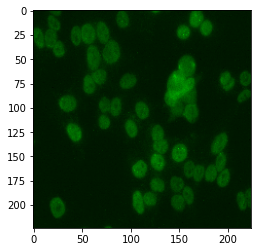

Nombre de la imagen:  119_3_1
Etiqueta de la imagen:  FewNuclearDots_NUMA-1MSA-1


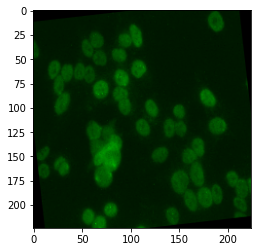

Nombre de la imagen:  119_3_2
Etiqueta de la imagen:  FewNuclearDots_NUMA-1MSA-1


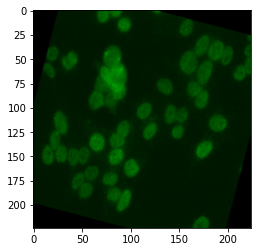

Nombre de la imagen:  119_3_3
Etiqueta de la imagen:  FewNuclearDots_NUMA-1MSA-1


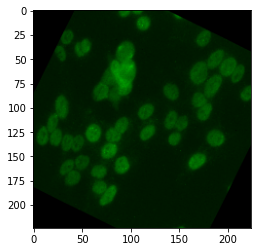

Nombre de la imagen:  119_3_4
Etiqueta de la imagen:  FewNuclearDots_NUMA-1MSA-1


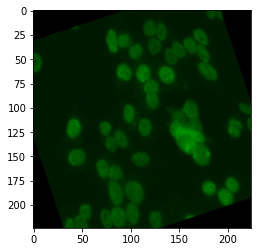

Nombre de la imagen:  802_1_0
Etiqueta de la imagen:  Negative


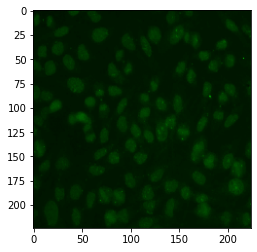

Nombre de la imagen:  802_1_1
Etiqueta de la imagen:  Negative


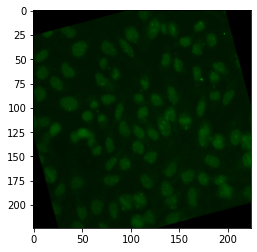

Nombre de la imagen:  802_1_2
Etiqueta de la imagen:  Negative


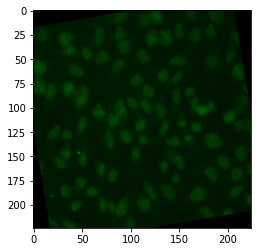

Nombre de la imagen:  802_1_3
Etiqueta de la imagen:  Negative


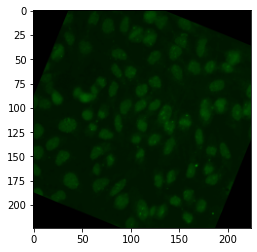

Nombre de la imagen:  802_1_4
Etiqueta de la imagen:  Negative


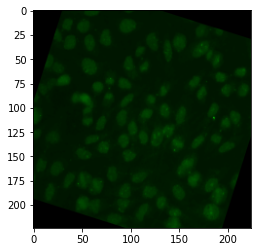

Nombre de la imagen:  37_1_0
Etiqueta de la imagen:  CoarseSpeckled_CytoplasmicReticularAMA


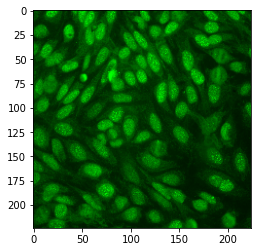

Nombre de la imagen:  37_1_1
Etiqueta de la imagen:  CoarseSpeckled_CytoplasmicReticularAMA


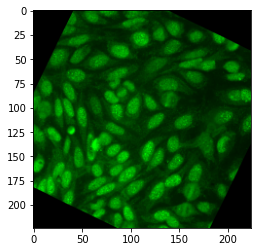

Nombre de la imagen:  37_1_2
Etiqueta de la imagen:  CoarseSpeckled_CytoplasmicReticularAMA


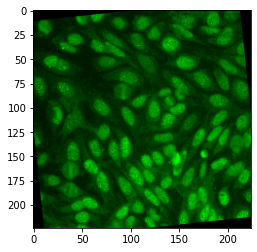

Nombre de la imagen:  37_1_3
Etiqueta de la imagen:  CoarseSpeckled_CytoplasmicReticularAMA


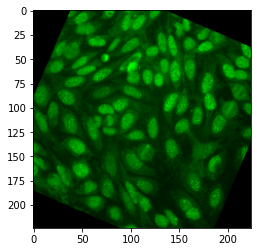

Nombre de la imagen:  37_1_4
Etiqueta de la imagen:  CoarseSpeckled_CytoplasmicReticularAMA


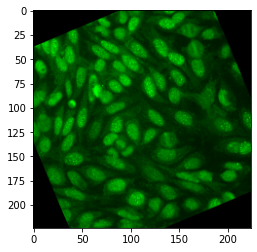

Nombre de la imagen:  397_2_0
Etiqueta de la imagen:  NuclearMembranous_FineSpeckled


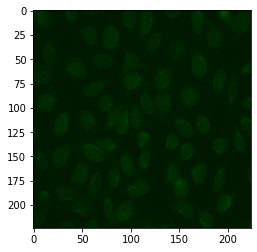

Nombre de la imagen:  397_2_1
Etiqueta de la imagen:  NuclearMembranous_FineSpeckled


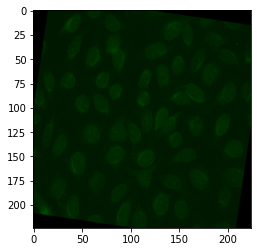

Nombre de la imagen:  397_2_2
Etiqueta de la imagen:  NuclearMembranous_FineSpeckled


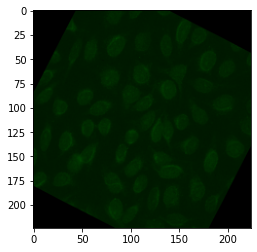

Nombre de la imagen:  397_2_3
Etiqueta de la imagen:  NuclearMembranous_FineSpeckled


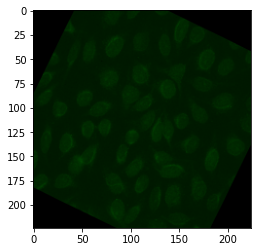

Nombre de la imagen:  397_2_4
Etiqueta de la imagen:  NuclearMembranous_FineSpeckled


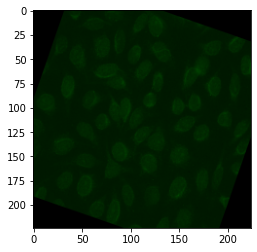

Nombre de la imagen:  507_1_0
Etiqueta de la imagen:  Negative


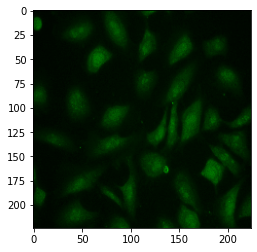

Nombre de la imagen:  507_1_1
Etiqueta de la imagen:  Negative


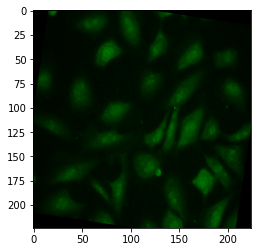

Nombre de la imagen:  507_1_2
Etiqueta de la imagen:  Negative


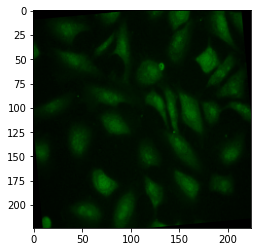

Nombre de la imagen:  507_1_3
Etiqueta de la imagen:  Negative


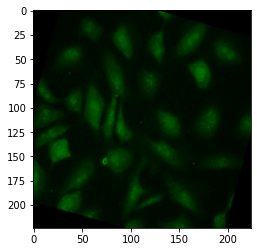

Nombre de la imagen:  507_1_4
Etiqueta de la imagen:  Negative


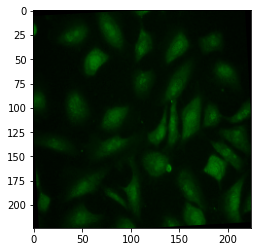

Nombre de la imagen:  435_3_0
Etiqueta de la imagen:  NucleolarHomogeneous


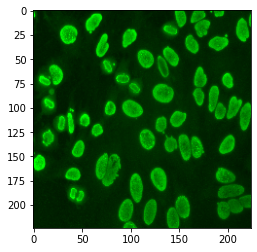

Nombre de la imagen:  435_3_1
Etiqueta de la imagen:  NucleolarHomogeneous


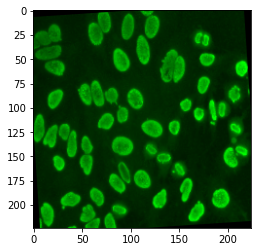

Nombre de la imagen:  435_3_2
Etiqueta de la imagen:  NucleolarHomogeneous


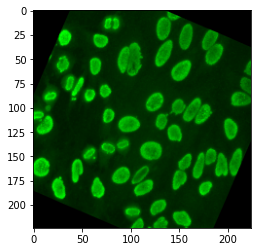

Nombre de la imagen:  435_3_3
Etiqueta de la imagen:  NucleolarHomogeneous


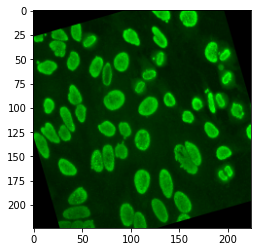

Nombre de la imagen:  435_3_4
Etiqueta de la imagen:  NucleolarHomogeneous


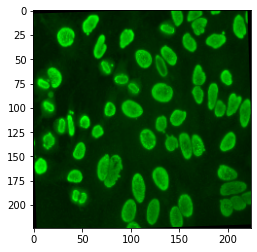

Nombre de la imagen:  898_1_0
Etiqueta de la imagen:  Negative


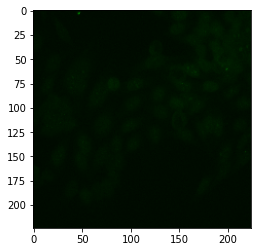

Nombre de la imagen:  898_1_1
Etiqueta de la imagen:  Negative


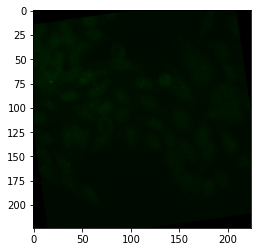

Nombre de la imagen:  898_1_2
Etiqueta de la imagen:  Negative


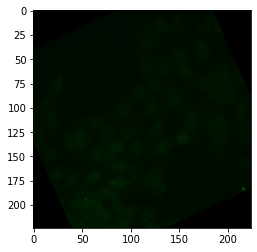

Nombre de la imagen:  898_1_3
Etiqueta de la imagen:  Negative


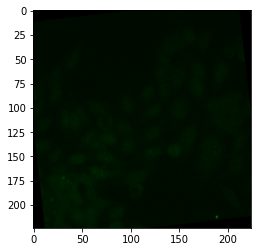

Nombre de la imagen:  898_1_4
Etiqueta de la imagen:  Negative


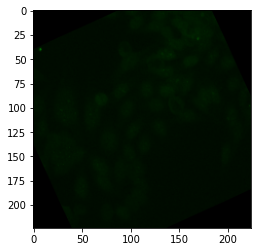

Nombre de la imagen:  88_1_0
Etiqueta de la imagen:  CytoplasmicSpeckled


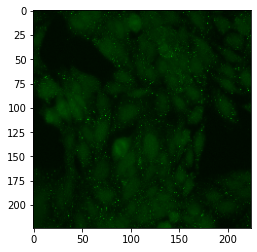

Nombre de la imagen:  88_1_1
Etiqueta de la imagen:  CytoplasmicSpeckled


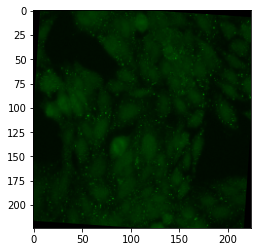

Nombre de la imagen:  88_1_2
Etiqueta de la imagen:  CytoplasmicSpeckled


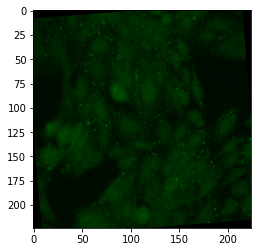

Nombre de la imagen:  88_1_3
Etiqueta de la imagen:  CytoplasmicSpeckled


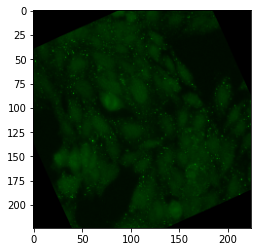

Nombre de la imagen:  88_1_4
Etiqueta de la imagen:  CytoplasmicSpeckled


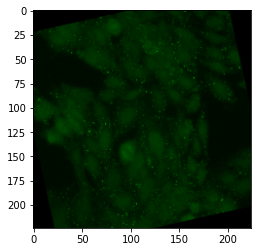

Nombre de la imagen:  264_2_0
Etiqueta de la imagen:  NuclearHomogeneous_CytoplasmicFibrillar


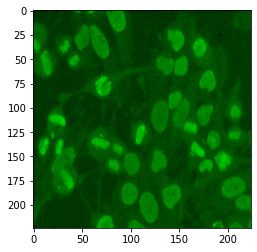

Nombre de la imagen:  264_2_1
Etiqueta de la imagen:  NuclearHomogeneous_CytoplasmicFibrillar


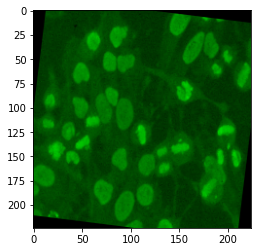

Nombre de la imagen:  264_2_2
Etiqueta de la imagen:  NuclearHomogeneous_CytoplasmicFibrillar


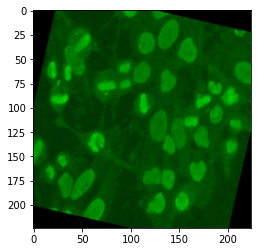

Nombre de la imagen:  264_2_3
Etiqueta de la imagen:  NuclearHomogeneous_CytoplasmicFibrillar


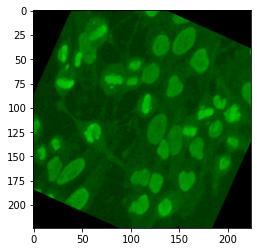

Nombre de la imagen:  264_2_4
Etiqueta de la imagen:  NuclearHomogeneous_CytoplasmicFibrillar


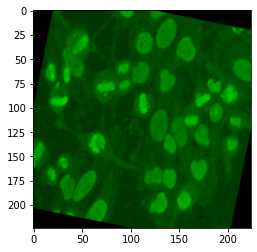

Nombre de la imagen:  289_1_0
Etiqueta de la imagen:  NuclearHomogeneous_FewNuclearDots


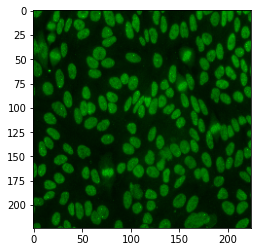

Nombre de la imagen:  289_1_1
Etiqueta de la imagen:  NuclearHomogeneous_FewNuclearDots


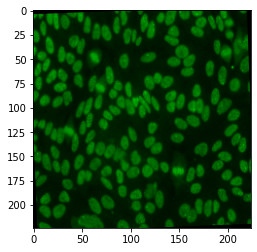

Nombre de la imagen:  289_1_2
Etiqueta de la imagen:  NuclearHomogeneous_FewNuclearDots


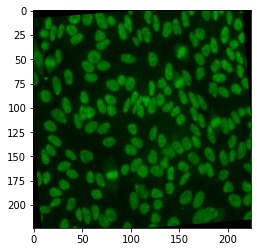

Nombre de la imagen:  289_1_3
Etiqueta de la imagen:  NuclearHomogeneous_FewNuclearDots


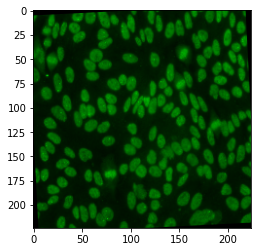

Nombre de la imagen:  289_1_4
Etiqueta de la imagen:  NuclearHomogeneous_FewNuclearDots


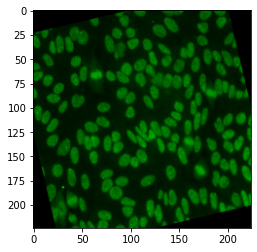

In [15]:
# Prove images with each label in the new file

images_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Augmented_dataset/'
labels_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/labels.csv'
names_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/names.csv'
preprocessing_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/'

labels_raw = pd.read_csv(labels_path, header = None)
labels_raw = labels_raw.values.tolist()
labels = []
for label in labels_raw:
  labels.append(label[0])

names = pd.read_csv(names_path, header = None)
names = names.values.tolist()

augmented_dataset = h5py.File("drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/Augmented_dataset.h5", 'r')

for i in range(0,50):
  label = labels[i]
  image_name = names[i][0].split('.')[0]
  image = augmented_dataset.get(image_name)[:]
  print("Nombre de la imagen: ", image_name)
  print("Etiqueta de la imagen: ", label)
  plt.imshow(image)
  plt.show()

augmented_dataset.close()

In [16]:
#----------Get all labels----------
aux = ''
patterns = {}
for pattern in labels_list:
  if pattern != aux:
    patterns[pattern] = labels_list.count(pattern)
    aux = pattern
  else:
    continue

print(patterns)
print('Numero de patrones en el dataset: ', len(patterns))

{'FewNuclearDots_NUMA-1MSA-1': 6, 'Negative': 581, 'CoarseSpeckled_CytoplasmicReticularAMA': 18, 'NuclearMembranous_FineSpeckled': 26, 'NucleolarHomogeneous': 21, 'CytoplasmicSpeckled': 25, 'NuclearHomogeneous_CytoplasmicFibrillar': 28, 'NuclearHomogeneous_FewNuclearDots': 30, 'FewNuclearDots_FineSpeckled': 23, 'CytoplasmicPolarGolgiLike': 21, 'NuclearMembranous_CytoplasmicPolarGolgiLike': 3, 'NuclearHomogeneous_CytoplasmicSpeckled': 24, 'FineSpeckled_NucleolarClumpy_CytoplasmicFibrillar': 3, 'Centromere': 26, 'CoarseSpeckled_NucleolarHomogeneous': 3, 'FineSpeckled_Midbody(MSA-2)': 24, 'FineSpeckled_CytoplasmicReticularAMA': 24, 'FineSpeckled_Centriole': 24, 'NuclearHomogeneous_Midbody(MSA-2)': 3, 'MultipleNuclearDots_CytoplasmicSpeckled': 3, 'NuclearHomogeneous_NucleolarClumpy_FineSpeckled': 3, 'NuclearHomogeneous_FineSpeckled_CytoplasmicSpeckled': 21, 'FewNuclearDots_CytoplasmicSpeckled': 6, 'Midbody(MSA-2)_CytoplasmicFibrillar': 3, 'NucleolarSpeckled_CytoplasmicReticularAMA': 6, 'Nu

In [17]:
#----------Verificar el estado de la memoria RAM----------
#!cat /proc/meminfo

In [18]:
!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-notebook", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/jupyter_core/application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 845, in launch_instance
    app.initialize(argv)
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 88, in inner
    return method(app, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/notebook/notebookapp.py", line 1507, in initialize
    self.init_webapp()
  File "/usr/local/lib/python3.7/dist-packages/notebook/notebookapp.py", line 1297, in init_webapp
    self.http_server.listen(port, self.ip)
  File "/usr/local/lib/python3.7/dist-packages/tornado/tcpserver.py", line 143, in listen
    sockets = bind_sockets(port, address=address)
  File "/usr/local/lib/python3.7/dist-packa